1. Import necessary libraries:

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


2. Load the Boston Housing Dataset:

In [3]:
df = pd.read_csv('housing_data.csv')
# Remove leading spaces from column names
df.columns = df.columns.str.strip()
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
# Separate features and target variable
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [7]:
# Make predictions
y_pred = model.predict(X_test)



In [8]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 38.17966016809935
R-squared Score: 0.6633993556963764


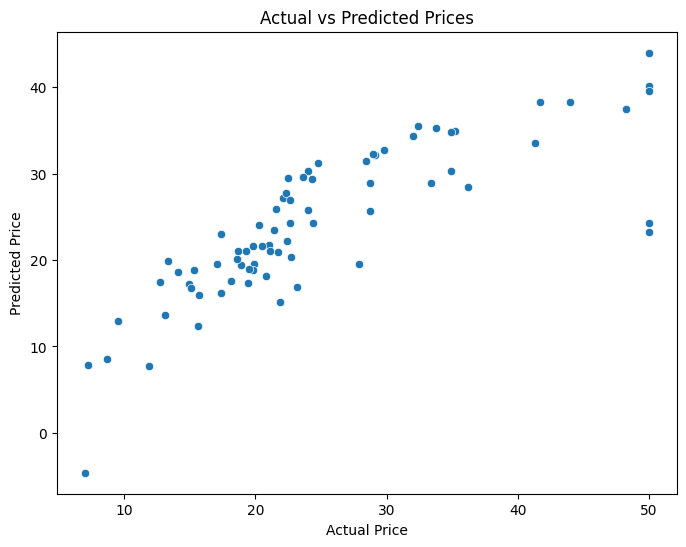

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

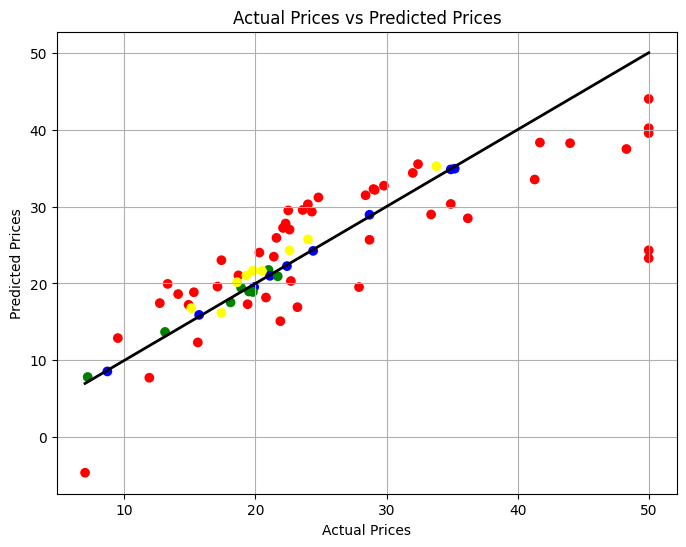

In [28]:
import numpy as np
# Calculate the absolute difference between actual and predicted prices
diff = np.abs(y_test - y_pred)

# # Define colors based on the difference
# colors = np.where(diff > 1, 'red', 'green')  # Use red for large differences, green for small differences


# Initialize the color array with a default color
colors = ['blue'] * len(diff)

# Assign colors based on the difference
for i, d in enumerate(diff):
    if d >= 2:
        colors[i] = 'red'
    elif d >= 1:
        colors[i] = 'yellow'
    elif d > 0.5:
        colors[i] = 'green'

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred,c=colors)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max(),'k-',lw=1]) 
# 'b': Blue
# 'g': Green
# 'r': Red
# 'c': Cyan 
# 'm': Magenta
# 'y': Yellow
# 'k-' -> line style dashed -- , - plain
# lw=1 -> line width
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k',lw=2)  # Diagonal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.grid(True)
plt.show()

